<a href="https://colab.research.google.com/github/caiocgoes/E-commerce/blob/main/E_COMMERCE_v1_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BIBLIOTECAS

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image, display


IMPORTAÇÃO DE DADOS

In [ ]:
df = pd.read_csv('VENDAS_GERAL_ALTERADO.csv')

VERIFICANDO DATASET

In [ ]:
df.head(10)

,pedido_id,data_criacao,status,produto,categoria,tipo_pagamento,faturamento
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,credit_card,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,voucher,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,87285b34884572647811a353c7ac498a,utilidades_domesticas,voucher,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,595fac2a385ac33a80bd5114aec74eb8,perfumaria,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,aa4383b373c6aca5d8797843e5594415,automotivo,credit_card,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,credit_card,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,credit_card,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,delivered,060cb19345d90064d1015407193c233d,automotivo,credit_card,175.26
8,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,invoiced,a1804276d9941ac0733cfd409f5206eb,NaN,credit_card,65.95
9,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,delivered,4520766ec412348b8d4caa5e8a18c464,automotivo,credit_card,75.16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69258 entries, 0 to 69257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pedido_id       69258 non-null  object 
 1   data_criacao    69257 non-null  object 
 2   status          69257 non-null  object 
 3   produto         68767 non-null  object 
 4   categoria       67780 non-null  object 
 5   tipo_pagamento  69254 non-null  object 
 6   faturamento     68767 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,faturamento
count,68767.000000
mean,141.595530
std,194.850958
min,6.080000
25%,55.360000
50%,92.060000
75%,158.280000
max,6929.310000


trocando tipo de dado da coluna 'data_criação'

In [ ]:
df['data_criacao'] = pd.to_datetime(df['data_criacao'], errors='coerce')

verificando as colunas novamente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69258 entries, 0 to 69257
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pedido_id       69258 non-null  object        
 1   data_criacao    69257 non-null  datetime64[ns]
 2   status          69257 non-null  object        
 3   produto         68767 non-null  object        
 4   categoria       67780 non-null  object        
 5   tipo_pagamento  69254 non-null  object        
 6   faturamento     68767 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.7+ MB


verificando colunas com NaN no dataframe

In [ ]:
df.isnull().sum()

,0
pedido_id,0
data_criacao,1
status,1
produto,491
categoria,1478
tipo_pagamento,4
faturamento,491


Substituindo nas colunas 'Categoria', 'Produto' e 'tipo_pagamento' valores 'NaN' por 'Não encontrado'. E na coluna de faturamento por 0

In [ ]:
df['produto'] = df['produto'].fillna("Não Encontrado")

In [ ]:
df['categoria'] = df['categoria'].fillna("Não Encontrado")

In [ ]:
df['tipo_pagamento'] = df['tipo_pagamento'].fillna("Não Encontrado")

In [ ]:
df['faturamento'] = df['faturamento'].fillna(0)

Apos o preenchimento das colunas, verificando novamente se a valores nulos

In [ ]:
df.isnull().sum()

,0
pedido_id,0
data_criacao,1
status,1
produto,0
categoria,0
tipo_pagamento,0
faturamento,0


A coluna que será usada nessa visão para calculo de faturamento será a coluna 'faturamento'. Verificando a distribuição de valores para essa coluna usando boxplot temos abaixo:

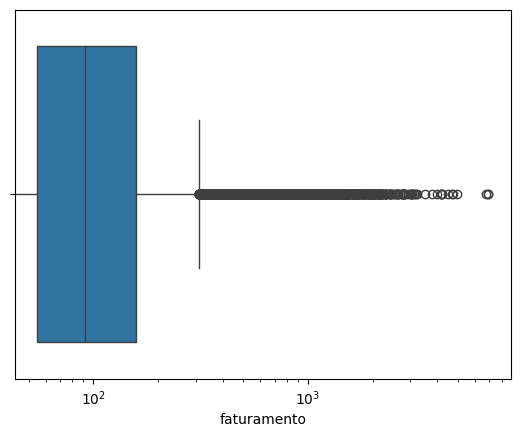

In [ ]:
sns.boxplot(x=df['faturamento'])
plt.xscale('log')

Tento em vista que se tem muitos outliers e que todos são de transações validas, então iremos considerar manter os valores outliers para a analise descritiva

ANALISE DESCRITIVA

1. Total de pedidos

In [ ]:
total_de_pedidos = df['pedido_id'].nunique()

In [ ]:
total_de_pedidos

58224

2. Ticket Médio

In [ ]:
ticket_médio = round(sum(df['faturamento'])/total_de_pedidos,2)

In [ ]:
ticket_médio

167.24

3. Faturamento

In [ ]:
faturamento_total = round(sum(df['faturamento']),2)

In [ ]:
faturamento_total

9737099.8

4. Top 5 categorias com maior faturamento

In [ ]:
import plotly.express as px
import pandas as pd

# Exemplo: agrupando faturamento por método de pagamento
faturamento = df.groupby('categoria')['faturamento'].sum().sort_values(ascending=False)

# Top 5 + Outros
top_5 = faturamento.head(5)

# Transformar em DataFrame
df_plot = top_5.reset_index()
df_plot.columns = ['Categoria de produto', 'Faturamento']

# Criar gráfico de pizza
fig = px.pie(
    df_plot,
    names='Categoria de produto',
    values='Faturamento',
    title='Top Categorias de produto com maior faturamento',
    hole=0,  # 0 para pizza, >0 para rosca
)

# Mostrar porcentagens e valores
fig.update_traces(
    textinfo='percent+label',
    hovertemplate='%{label}<br>Faturamento: R$ %{value:,.0f}<br>%{percent}'
)

# Layout
fig.update_layout(
    width=900,   # largura maior
    height=700,   # altura maior
    showlegend=False
)

Como pode ser visto, dentre as categorias com maior faturamento, podemos ver que as top 5 possuem um faturamento aproximado

5. Faturamento por método de pagamento

In [ ]:
# Exemplo: agrupando faturamento por método de pagamento
df = df[df['tipo_pagamento'] != "Não Encontrado"]
df = df[df['tipo_pagamento'] != "not_defined"]
faturamento = df.groupby('tipo_pagamento')['faturamento'].sum().sort_values(ascending=False)

# Top 5 + Outros
top_5 = faturamento.head(5)
outros_valor = faturamento.iloc[5:].sum()
if outros_valor > 0:
    top_5.loc['Outros'] = outros_valor

# Transformar em DataFrame
df_plot = top_5.reset_index()
df_plot.columns = ['Método de Pagamento', 'Faturamento']

# Criar gráfico de pizza
fig = px.pie(
    df_plot,
    names='Método de Pagamento',
    values='Faturamento',
    title='Top Métodos de Pagamento com maior faturamento',
    hole=0,  # 0 para pizza, >0 para rosca
)

# Mostrar porcentagens e valores
fig.update_traces(
    textinfo='percent+label',
    hovertemplate='%{label}<br>Faturamento: R$ %{value:,.0f}<br>%{percent}'
)

# Layout
fig.update_layout(
    legend_title_text='Método de Pagamento',
    width=800,   # bem largo
    height=600,   # mais alto
    font=dict(size=16)  # aumenta a fonte de tudo
)

Metodo de pagamento mais usado foi cartão de credito com mais de 70 % de uso por parte dos clientes

6.  Faturamento por produto

In [ ]:
# Supondo que o df original tenha as colunas: produto, faturamento, pedido_id
df_faturamento = df.groupby("produto").agg(
    faturamento=("faturamento", "sum"),
    total_pedidos=("pedido_id", "nunique")  # conta pedidos distintos
).reset_index()

# Calcular ticket médio por produto
df_faturamento["ticket_medio"] = df_faturamento["faturamento"] / df_faturamento["total_pedidos"]

# Remover produtos indesejados
df_faturamento = df_faturamento[df_faturamento['produto'] != "Não Encontrado"]

# Ordenar pelo faturamento
df_faturamento = df_faturamento.sort_values(by="faturamento", ascending=False)

# Criar tabela estilizada com Plotly
fig = go.Figure(
    data=[go.Table(
        header=dict(
            values=[
                "<b>Produto</b>",
                "<b>Faturamento (R$)</b>",
                "<b>Total de Pedidos</b>",
                "<b>Ticket Médio (R$)</b>"
            ],
            fill_color="royalblue",
            font=dict(color="white", size=14),
            align="center"
        ),
        cells=dict(
            values=[
                df_faturamento['produto'],
                df_faturamento['faturamento'],
                df_faturamento['total_pedidos'],
                df_faturamento['ticket_medio']
            ],
            fill_color=[["lavender", "white"] * (len(df_faturamento)//2 + 1)],
            align="center",
            font=dict(size=12),
            format=["", ",.2f", ",d", ",.2f"]  # formato: R$ e inteiros
        )
    )]
)

# Ajustar layout
fig.update_layout(
    title="Faturamento, Pedidos e Ticket Médio por Produto",
    title_x=0.5,
    width=1200,
    height=800
)

7 - Faturamento ao longo do tempo

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Converter a data
df['data_criacao'] = pd.to_datetime(df['data_criacao'])

# Agrupar por dia
df_dia = df.groupby(df['data_criacao'].dt.date).agg(
    faturamento=('faturamento', 'sum')
).reset_index()

# Renomear para padronizar
df_dia.rename(columns={'data_criacao': 'data'}, inplace=True)

# Criar gráfico sem rótulos
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_dia['data'],
    y=df_dia['faturamento'],
    mode='lines+markers',
    fill='tozeroy',
    line=dict(color='navy', width=2),
    marker=dict(size=4, color='royalblue'),
    name='Faturamento diário'
))

# Layout limpo
fig.update_layout(
    title='Faturamento Diário (Estilo Cardiograma - Sem Rótulos)',
    title_x=0.5,
    xaxis_title='Data',
    yaxis_title='Faturamento (R$)',
    yaxis_tickformat=',.0f',
    width=1100,
    height=500,
    plot_bgcolor='white'
)

fig.update_xaxes(showgrid=True, gridcolor='lightgray', tickangle=-45)
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

Pode ser visto que o periodo de maior faturamento se deu no final de 2017 e maio e agosto de 2018  